### Opdracht 1 Oefenen met MNIST dataset

In deze opdracht gaan we de fashion_MNIST dataset gebruiken, die zit inbegrepen in tensorflow.

### Load libraries


In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

In this dataset the training and testing data is split right away.

In [43]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Class names are not included, so store them yourself:

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### exploring data

The following output using shape means 60.000 images represented as 28x28 pixels:

In [45]:
train_images.shape

(60000, 28, 28)

Likewise there are 60.000 labels in thee training set:

In [46]:
len(train_labels)

60000

And each label is an int between 0 and 9:

In [47]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10.000 training images in the test set, each image represents 28 x 28 pixels:

In [48]:
test_images.shape

(10000, 28, 28)

And the test set contisn 10.000 images labels:

In [49]:
len(test_labels)

10000

Train and test labels are identical, just to be srue: 

In [50]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Preprocess the data

Before training a network the data must be preprocessed. The image below shows that pixel values fall in the range of 0 to 255:

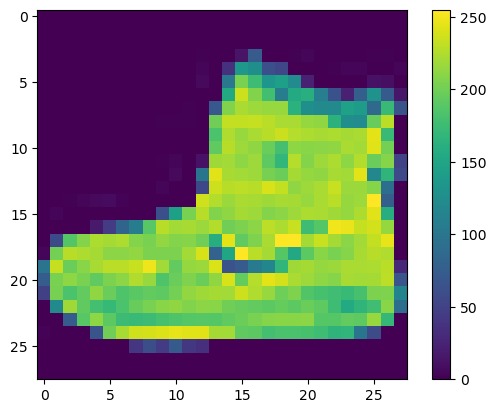

In [51]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them into the neural network model. To do so, devide values by 255. BOTH TRAINING AND TESTING SET MUST BE PREPROCESSED THE SAME WAY!

In [52]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Visualize data

To verify the data is in the correct format, displat the first 25 images from TRAINING set and displat class name below each image.

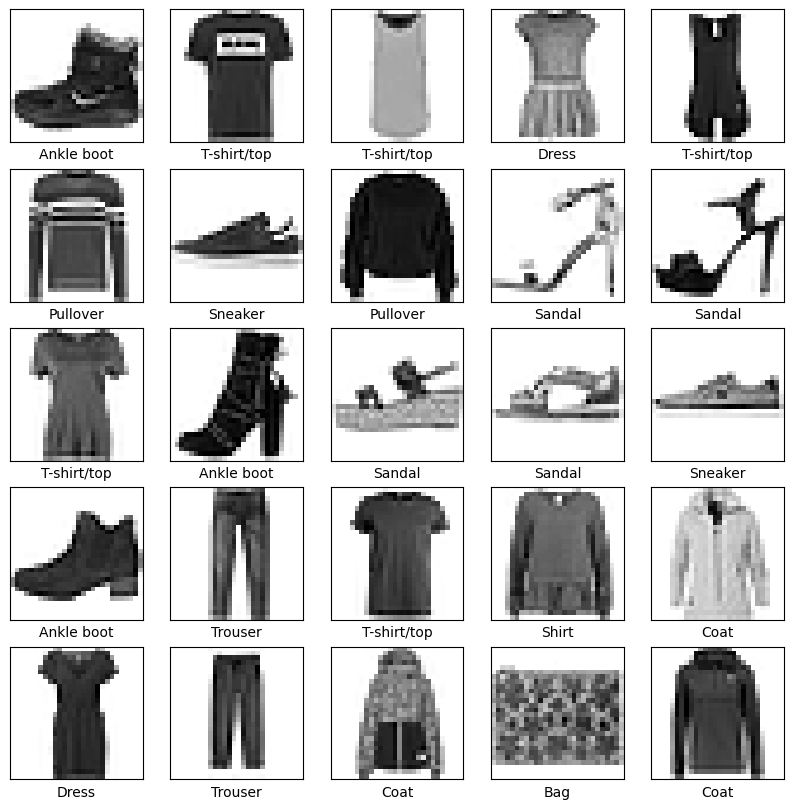

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Split the data

Already completed the splitting step when loading in the data.

### Build the model

First configure the layers of the mode, then compile the model. 

We gebruiken de tf.keras.layers module als layer. Deze heeft parameters die geleerd worden tijdens training.

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\isabe\anaconda3\envs\modelleren_van_kanker\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sommige layers in een neuraal netwerk (zoals Dense lagen) werken met one-dimentional arrays, omdat ze een vaste inputgrootte nodig hebben. 

Eerste layer: transforms the format of images from two-dimensional array (28 by 28 pixels) to a one-dimensional array (28 * 28 = 784 pixels) Dit process heet flattening. De eerste layer is er alleen om data te reformatten.

We hebben 10 neuronen, omdat we 10 klasse hebben (jurk, T-shirt, tas, etc). Elk van de 10 neuronen produceert een logit, wat een ruwe score is (een niet-genormaliseerde waarde die item matcht met class) 

### Compile model

Voordat je het model kan runnen heb je nog wat settings nodig, dit gebeurt tijdens de COMPILE STAP."

- Optimizer: dit is hoe een model geupdate wordt gebaseerd op de data en loss functie
- Loss functie: Dit meet hoe accuraat het model is tijdens training. Je wilt deze zo laag mogelijk om het model beter te laten presteren.
- Metrics: gebruikt om de training en testing steps te monitoren. Het voorbeeld beneden gebruikt accuracy, de fractie van de plaatjes die correct geclassificeerd zijn:

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train het model

Een neural network training gebruikt de volgende stappen:

1. Voed het model training data (train_images, train_labels)
2. Het model leert images en labels te verbinden
3. Vraag het model om predictions te maken van de testset (test_images)
4. verify dat de predictions de labels matchen van test_labels array

Stap 1: voeden

Je gebruikt mode.fit om het model te "fitten" aan trainingdata

In [56]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.7766 - loss: 0.6392
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.8587 - loss: 0.3941
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.8743 - loss: 0.3436
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8837 - loss: 0.3166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.8917 - loss: 0.2918
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.8973 - loss: 0.2795
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9013 - loss: 0.2677
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.9041 - loss: 0.2577
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9103 - loss: 0.2412
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9114 - loss: 0.2380


Dit model komt bij 91% accuracy en de loss is verlaagd naar 0.25.

Stap 2: 

Vergelijk hoe het model het doe met de test dataset

In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 907us/step - accuracy: 0.8805 - loss: 0.3518

Test accuracy: 0.8805000185966492


De accuracy van de test dataset is 88%, wat minder is dan de 91% van onze training dataset. Deze gap komt door OVERFITTING. Dat gebeurt als een machine learning model slechter presteert op data die hij nog niet gezien heeft.

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

### Maak predictions

Met het model nu getrained kan je predictions maken door de softmax layer toe te voegen, deze softmax functie zet de logits om tot probabilities. 

In [58]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [59]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


Het modeel heeft nu voor elke image een label voorspeld in de testing dataset. Laten we kijken naar de eerste prediction:

In [60]:
predictions[0]

array([1.8565976e-06, 1.6279044e-07, 1.7412876e-07, 2.3159659e-07,
       1.0339097e-07, 3.1449920e-03, 4.1312451e-06, 5.9961725e-02,
       1.1734267e-06, 9.3688554e-01], dtype=float32)

Een prediction is een array van 10 nummers hier, en het geeft aan wat het models "confidence" is dat een image correspondeerd met 10 verschillende kledingartikelen. Je kan op deze manier zien welk label de hoogste waarde heeft:

In [61]:
np.argmax(predictions[0])

9

Het model is meest confident in het feit dat deze image een anle boot, ofterwijl class_names[9] is. En als je dan het test-label ziet dan zie je ook dat dat correct is:

In [62]:
test_labels[0]

9

Functie om de vollegige 10 class predictions to graphen:

In [63]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

We kijken naar de 0th image, predictions en prediction array.Corrected prediction labels zijn blauw en incorrecte prediction labels zijn rood. Het number geeft het percentage (uit 100) voor het predicted label.

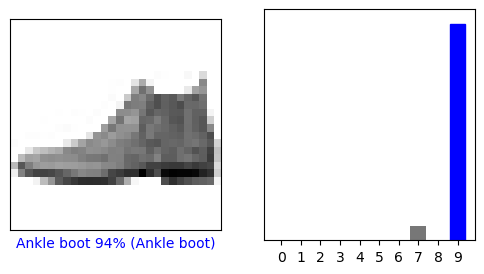

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

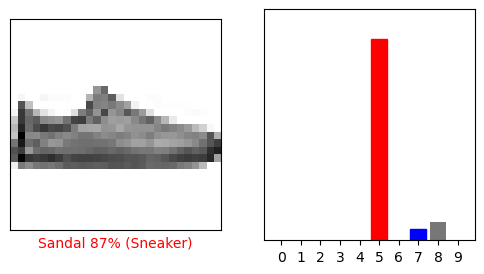

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Now plot several predictions:

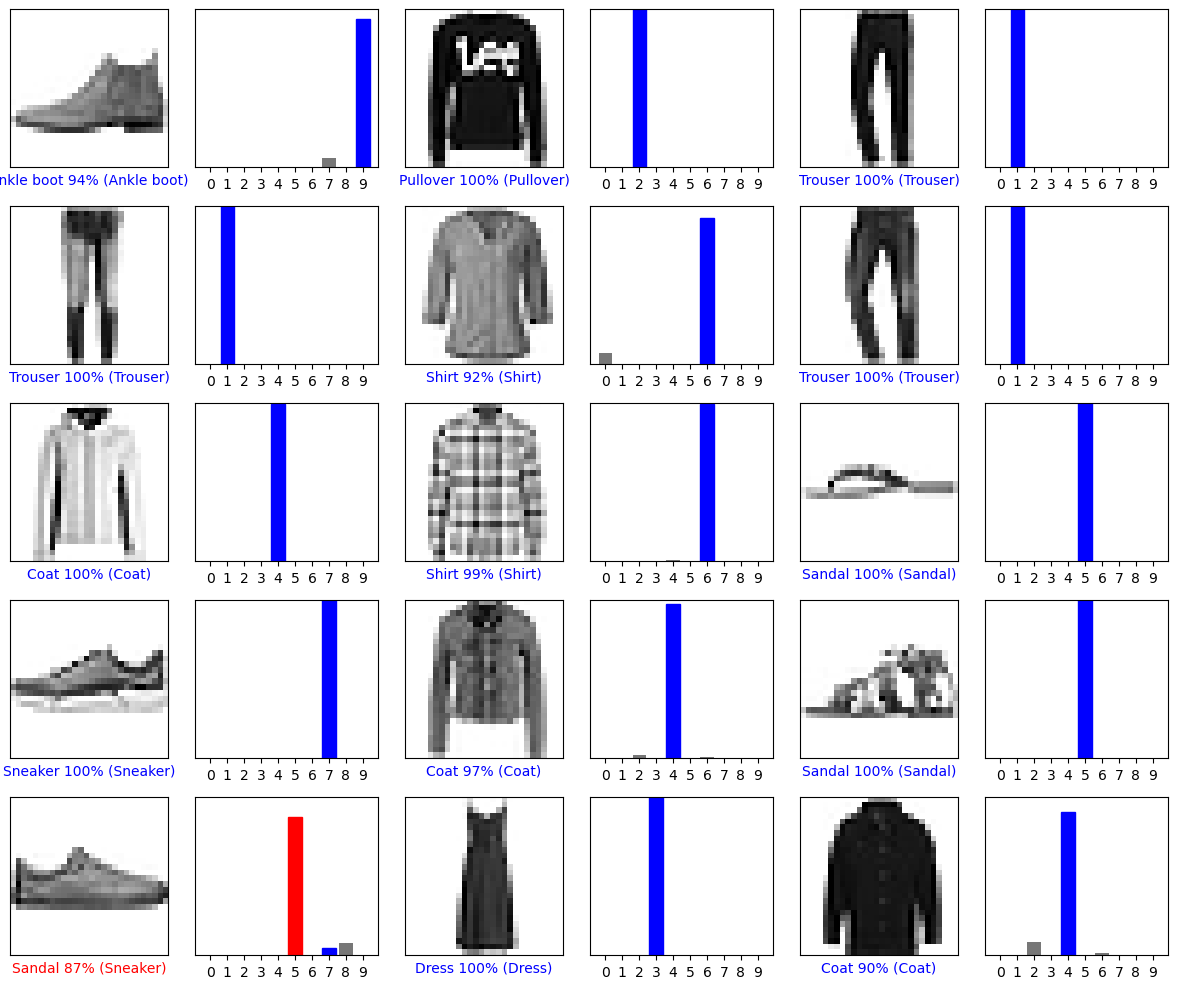

In [66]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use trained model

Dan nu, gebruik het getrained model om een enkele image te predicten:

In [67]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Sinds tf.keras models geoptimaliseerd zijn voor BATCH predictions moet je, zelfs als je maar 1 image gebruikt, het in een lijst zetten:

In [68]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [69]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4.7558246e-05 1.6923251e-16 9.9918753e-01 1.1500108e-13 4.1191452e-04
  1.0031523e-14 3.5305688e-04 1.7072054e-24 3.1763225e-10 5.0736860e-18]]


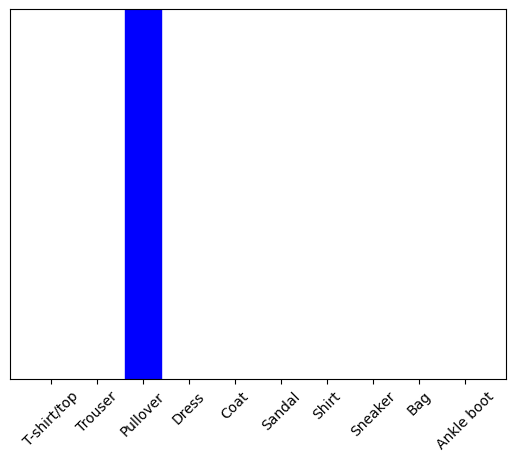

In [70]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict geeft een lijst van lijsten terug, 1 lijst voor elke image in de batch data. Pak de predictions van onze image die we gebruikt hebben:

In [71]:
np.argmax(predictions_single[0])

2

Het is voorspeld zoals verwacht. 

### Foto van mezelf